# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv('spam.csv', encoding= 'latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 5)

In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Pre-Processing

In [10]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1,inplace=True)

In [11]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.rename({'v1': 'target','v2' : 'sms'}, axis=1, inplace= True)

In [14]:
df.columns

Index(['target', 'sms'], dtype='object')

In [15]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Check for duplicated values
#df.duplicated()
df[df.duplicated()]

,target,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [17]:
# sum of duplicated records
df.duplicated().sum()

403

In [18]:
# droping duplicates records
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(5169, 2)

In [20]:
# checking duplicated records
df.duplicated().sum()

0

# Analysis & Visualization

In [21]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [22]:
df['target'].value_counts(normalize=True)*100

target
ham     87.366996
spam    12.633004
Name: proportion, dtype: float64

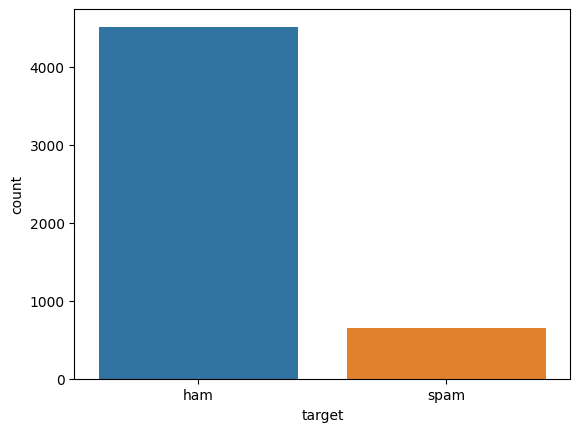

In [23]:
# checking unbalanced between data
sns.countplot(x=df['target'])
plt.show()

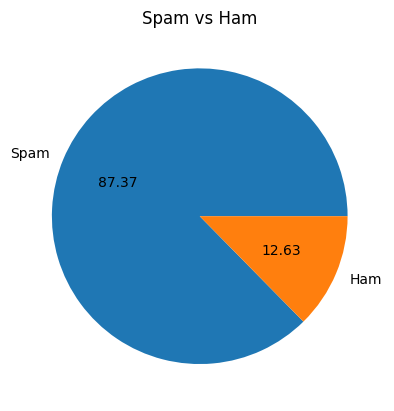

In [24]:
# chekcing percentages of data
plt.pie(x=df['target'].value_counts(), labels=['Spam','Ham'], autopct='%.2f')
plt.title('Spam vs Ham')
plt.show()

In [25]:
from wordcloud import WordCloud

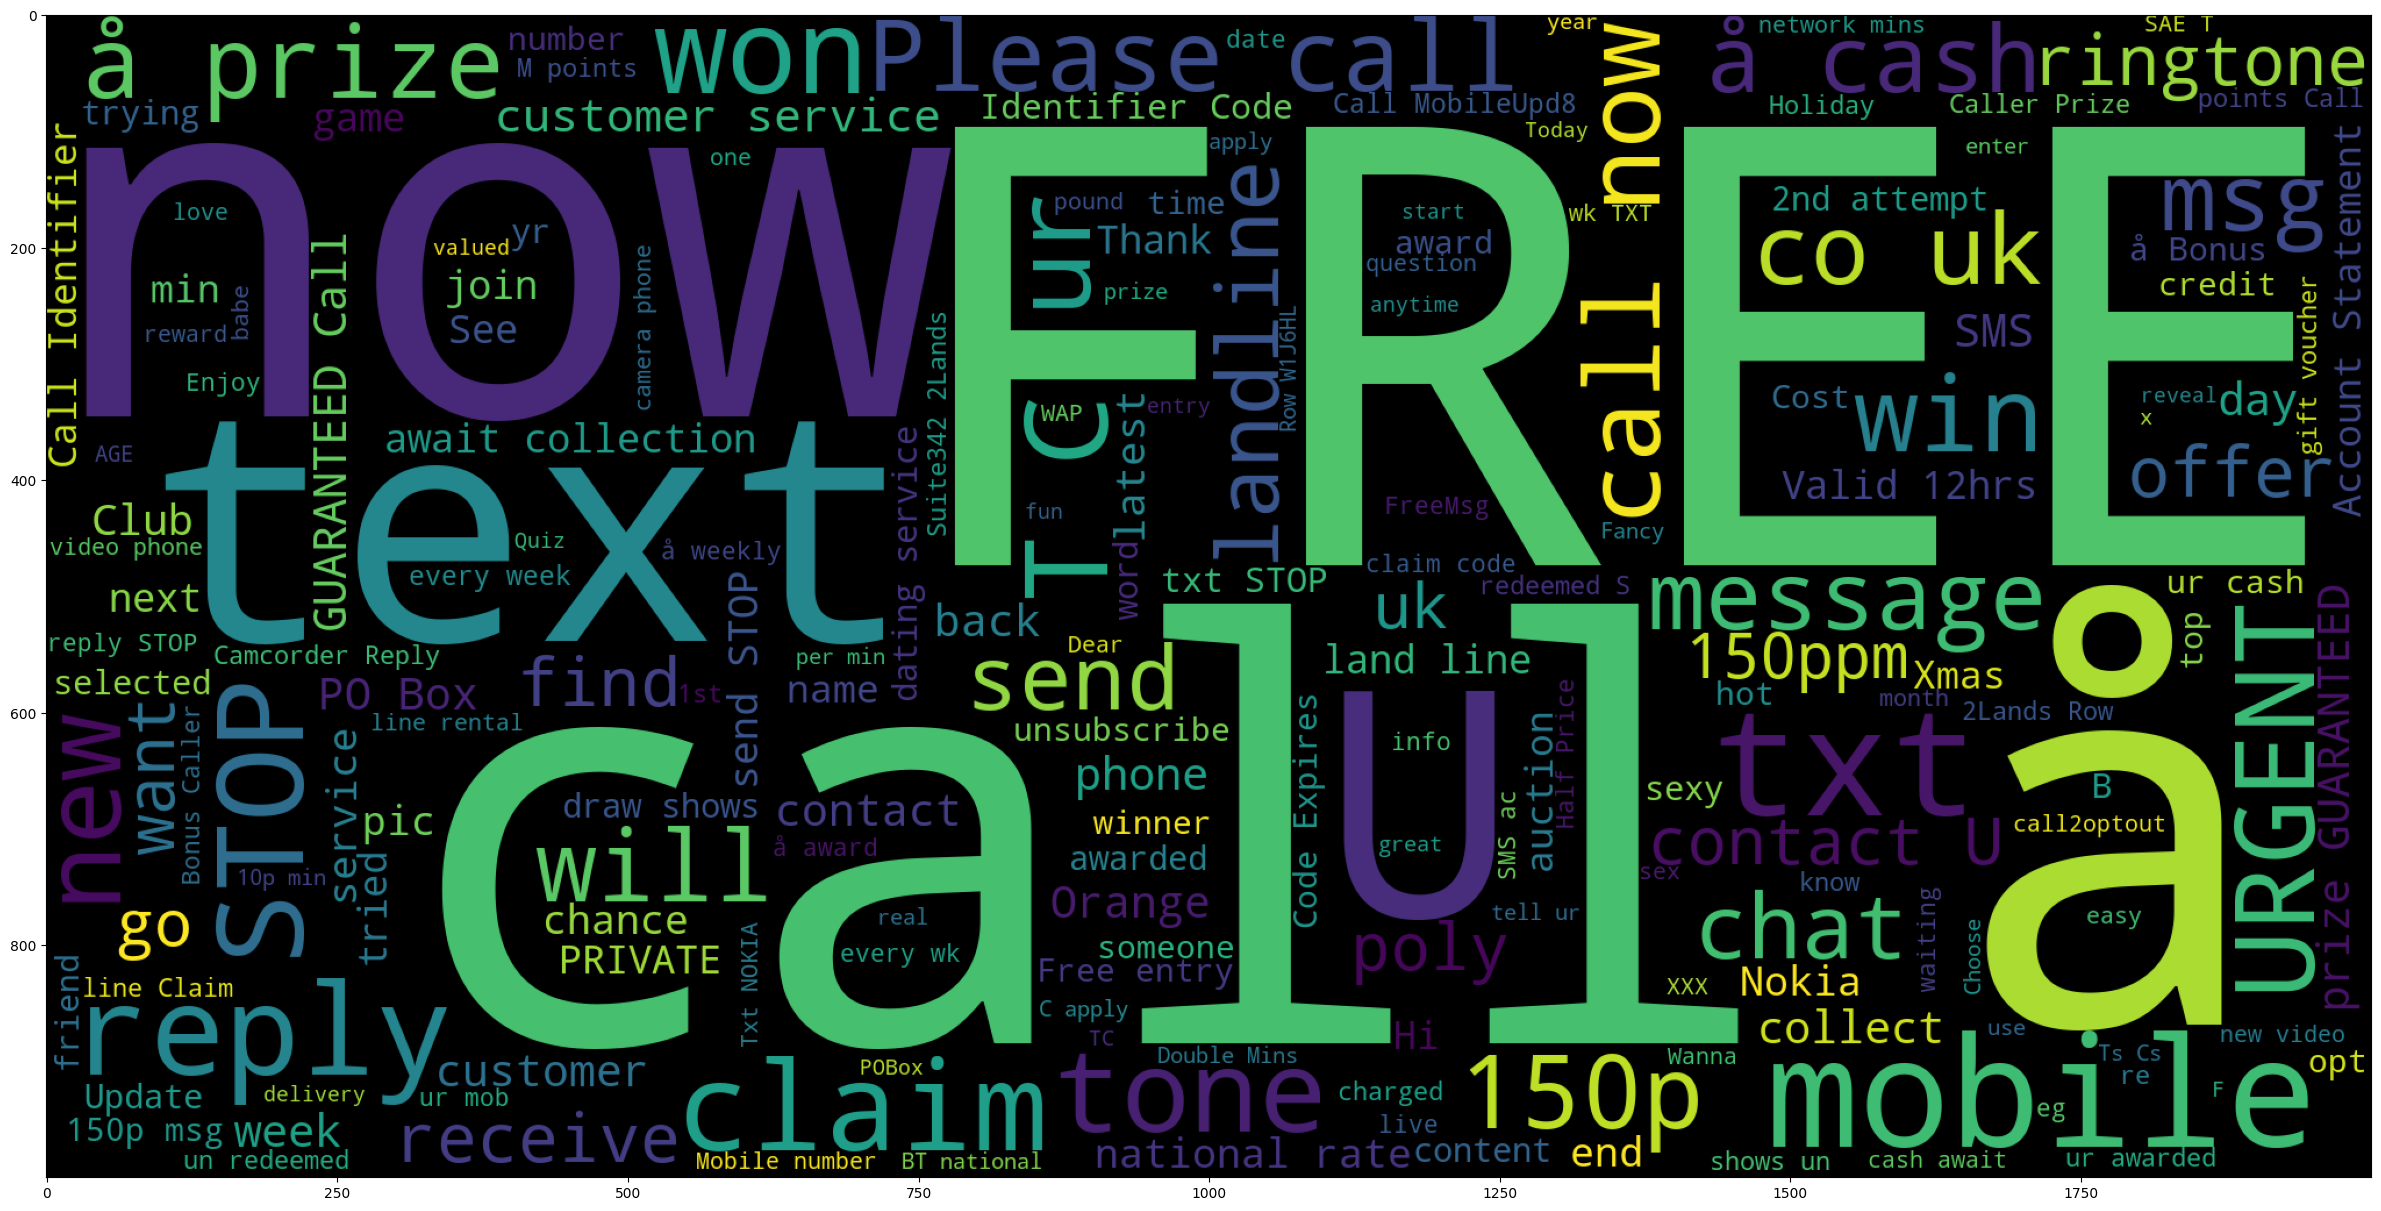

In [26]:
# Highlight spam sms words
plt.figure(figsize=(30,30))
wc_spam = WordCloud(width=2000, height=1000,background_color='black').generate(df[df['target']=='spam']['sms'].str.cat(sep=" "))
plt.imshow(wc_spam)
plt.show()

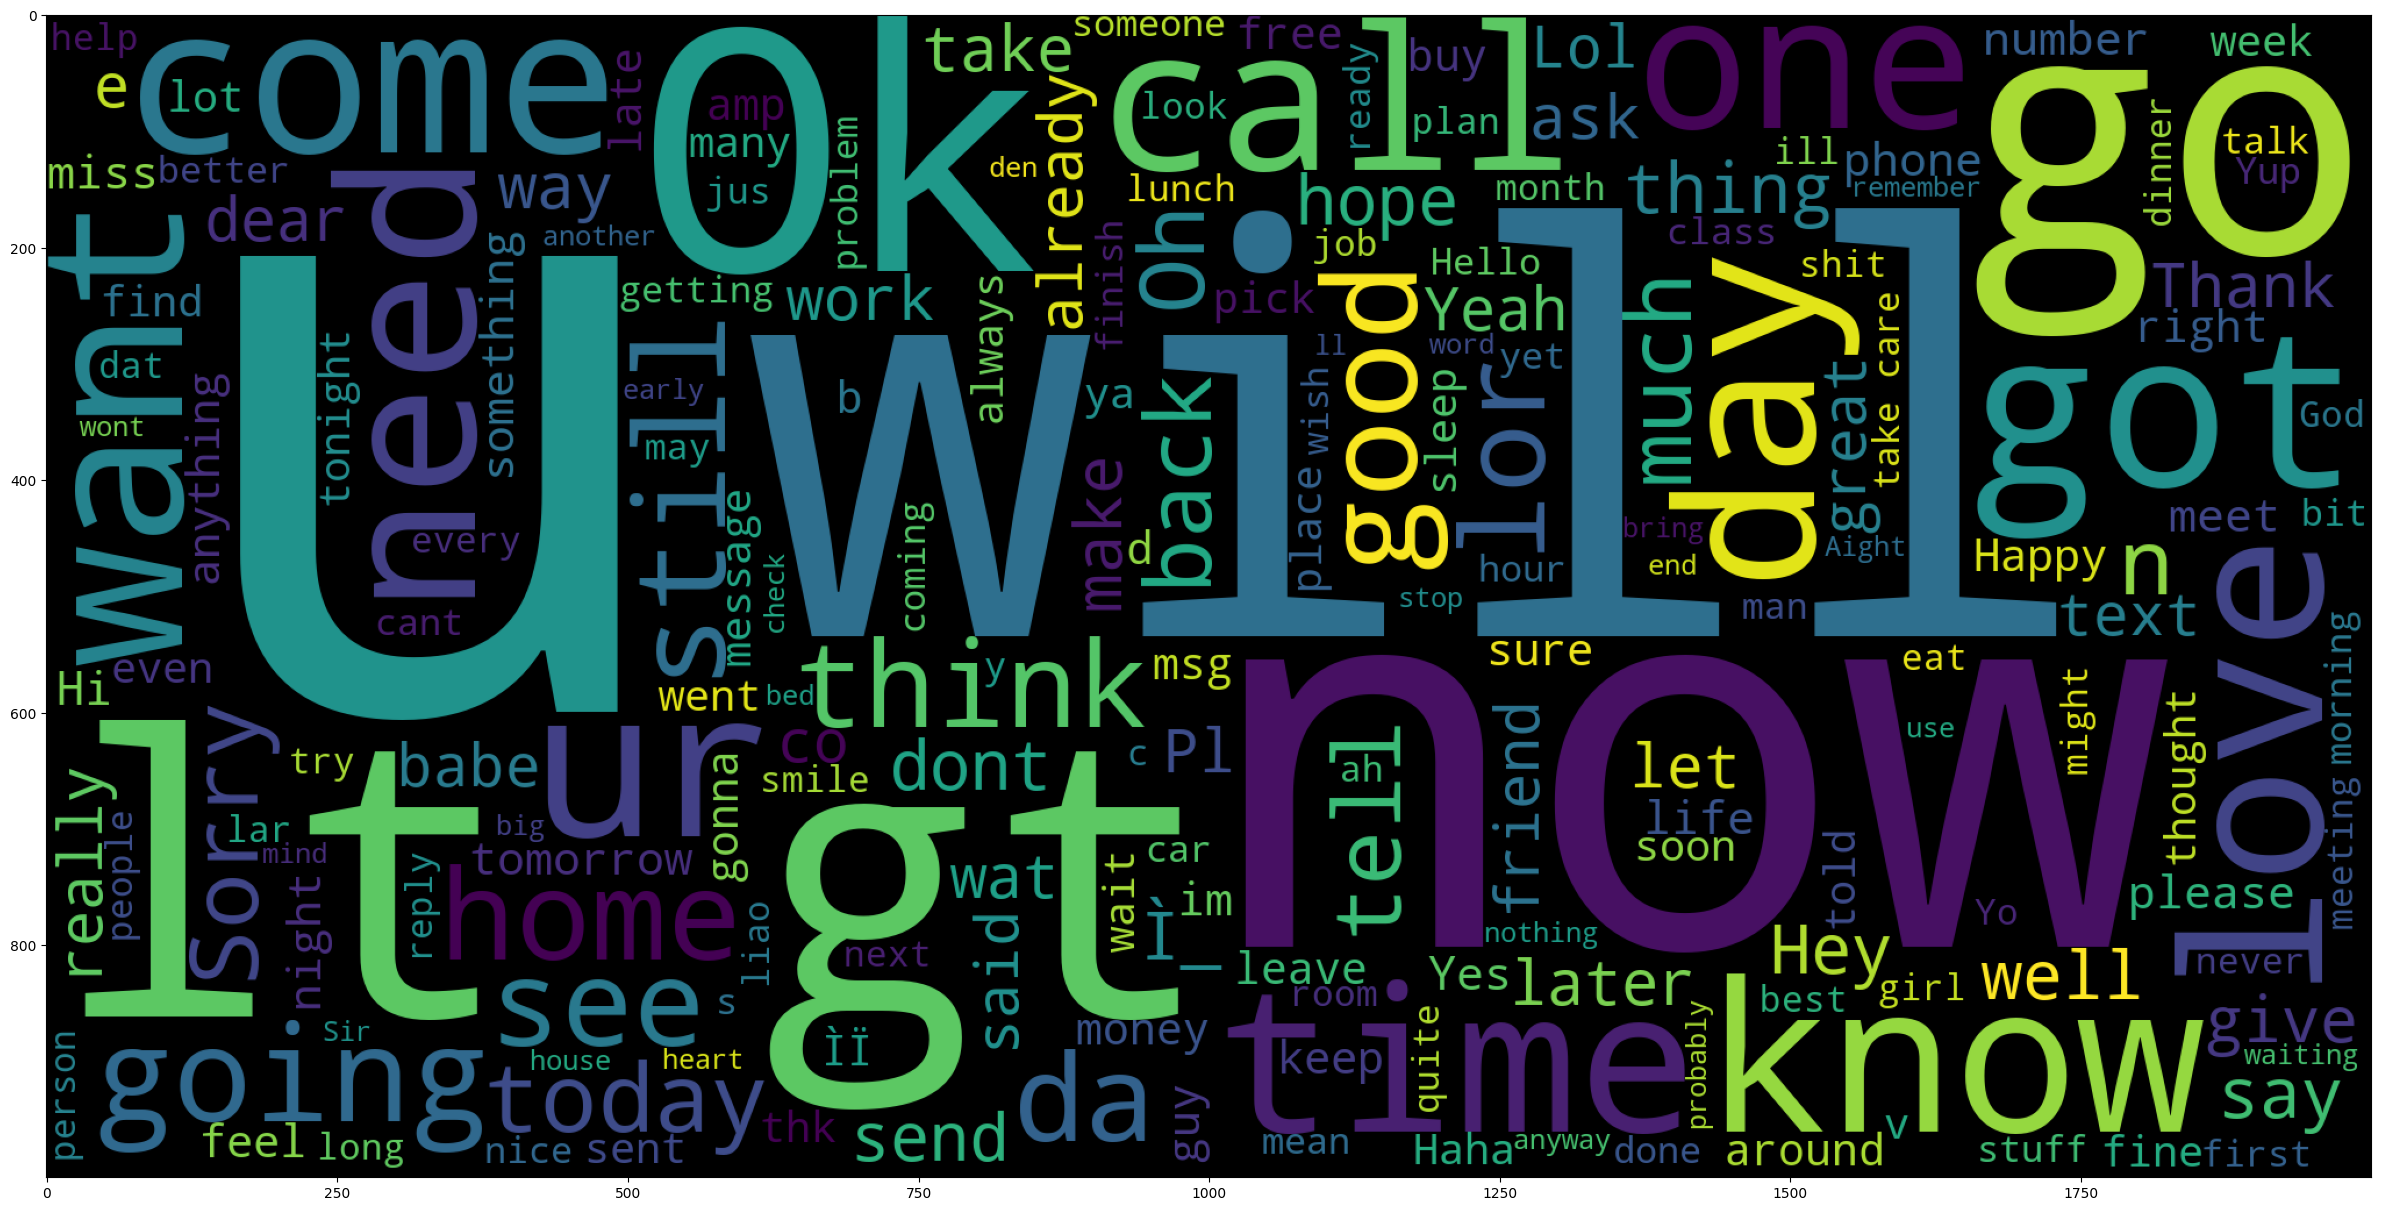

In [27]:
# Highlight ham sms words
plt.figure(figsize=(30,30))
wc_ham = WordCloud(width=2000, height=1000,background_color='black').generate(df[df['target']=='ham']['sms'].str.cat(sep=" "))
plt.imshow(wc_ham)
plt.show()

In [28]:
# converting 'spam' as 1 and 'ham' as 0 numeric value
df['target'] = df['target'].map({'spam': 1, 'ham': 0 })

In [29]:
df['target'].unique()

array([0, 1], dtype=int64)

In [30]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# Converting 'sms' text data into numeric
from sklearn.feature_extraction.text import TfidfVectorizer


In [32]:
tfidf = TfidfVectorizer()

In [33]:
x = tfidf.fit_transform(df['sms']).toarray()

In [34]:
x.shape

(5169, 8672)

In [38]:
y = df['target'].values

In [39]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# Training Phase

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [42]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (3618, 8672)
x_test - >   (1551, 8672)
y_train - >   (3618,)
y_test - >   (1551,)


In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [45]:
model.fit(x_train, y_train)

LogisticRegression()

# Testing phase

In [46]:
y_pred = model.predict(x_test)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score, precision_score

In [50]:
print("accuracy score :- ",accuracy_score(y_test,y_pred))
print("precision score :- ",precision_score(y_test,y_pred))

accuracy score :-  0.9529335912314636
precision score :-  0.9803921568627451


In [52]:
from sklearn.svm import SVC

In [53]:
model_svm = SVC()

In [54]:
model_svm.fit(x_train,y_train)

SVC()

In [55]:
y_pred_svm=model_svm.predict(x_test)
print("accuracy score :- ",accuracy_score(y_test,y_pred_svm))
print("precision score :- ",precision_score(y_test,y_pred_svm))

accuracy score :-  0.9729206963249516
precision score :-  0.9944444444444445
